# Derin Öğrenmenin Temelleri Hakkında Özet

📆 Bu özetin gündeminde neler var?

- ***Giriş***: Belgeleri nasıl okumalı?
- ***Bölüm 1️⃣***: Tensorflow ve Keras'ın gizemi (👨🏻‍🏫 Öğretmen liderliğinde)
- ***Bölüm 2️⃣***: Tensorflow mu Numpy mi? (👨🏻‍🏫 Öğretmen liderliğinde)
- ***Bölüm 3️⃣***: Orman Yangınları Mücadelesi (👩‍🎓 Öğrenci liderliğinde)

## Giriş: Belgeleri nasıl okunur?

✅ [Keras.io](https://keras.io/getting_started/) üst düzey Keras API'sının belgeleri:
- Birçok derin öğrenme görevi için çok sayıda öğretici içerir.
- Daha ayrıntılı geliştirici kılavuzları da içerir.
- Tam Keras API belgeleri de içerir.
- Keras 3 belgelerini her zaman kontrol ettiğinizden emin olun.

&nbsp;

✅ [Tensorflow.org](https://www.tensorflow.org/overview) size başvurabileceğiniz iki ana sayfa sunar:
- [Öğretici](https://www.tensorflow.org/tutorials)
- [Kılavuz](https://www.tensorflow.org/guide)
- Bu eğitimlerin `Colab-Notebooks`'larını bile çalıştırabilirsiniz

&nbsp;

✅ TensorFlow [API belgeleri](https://www.tensorflow.org/api_docs/python/tf/), Keras için kullandığımız kapsamlı (ve bazen çok düşük seviyeli) TensorFlow destekli belgelerdir:
- Google Arama'da öncelikli olarak görünür
- [Bazen](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), ilgili Öğreticiler veya Kılavuzlara referanslar verebilir

# 1️⃣ - Tensorflow ve Keras'ın gizemi çözülüyor 
_(🧑🏻‍🏫 Öğretmen liderliğinde)_

👉 Hedef: Tensorflow ve Keras kullanarak, sahte bir veri kümesi oluşturun ve bununla sahte bir model oluşturun.

### (1) Tensörler?

📚 [Online Guide](https://www.tensorflow.org/guide/tensor)

In [1]:
# Dizüstü bilgisayar tabanlı deneyler için her şeyi içe aktarmak sorun değildir!
import tensorflow as tf
import keras
import numpy as np

In [2]:
# Tensörler, numpy nesnelerinin etrafını saran sarmalayıcılardır.

X = tf.constant([[1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.]])
X

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [3]:
tf.ones((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
x = X.numpy()
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [5]:
# Tensörlerin bir şekli vardır
X.shape

TensorShape([3, 3])

In [6]:
# Tensörler Numpy nesnelerinden başlatılabilir
tf.constant(x)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [7]:
# Numpy'ye benzer sözdizimi ile manipüle edilebilirler.
tf.add(X,X)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [8]:
# Tersine, Numpy de Tensor öğelerini kabul eder!
np.add(X,X)

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)

In [9]:
# Tensors kullanarak özel MSE kayıp fonksiyonu örneği

def loss(y_true, y_pred):
    err = y_true - y_pred
    return tf.reduce_mean(tf.square(err))

y_true = tf.ones((10,3))
y_pred = tf.ones((10,3)) + 0.1 * tf.random.normal((10,3))

loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0074093714>

#### Other Tensors?

**Seyrek Tensörler**
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/sparse_tensors.png">

In [10]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
sparse_tensor.shape

TensorShape([3, 4])

**Ragged Tensors**
<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/ragged_tensors.png">

In [11]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape

TensorShape([4, None])

### (2) `Sequential API` ile bir sinir ağı oluşturun

👉 Her biri 3 özellikten oluşan 10 rastgele gözlem `X` ve tek boyutlu bir hedef `y` oluşturalım. 

In [12]:
# Her biri için 10 özellik içeren 100 gözlem oluşturalım.
X = tf.random.uniform((100,10))

In [13]:
# Ve sahte hedefimizi her gözlemin ortalaması olarak basitçe oluşturun
y = tf.reduce_mean(X, axis=1)
y.shape

TensorShape([100])

👉 “Çalışan” basit bir yoğun model oluşturalım.

In [14]:
from keras import Sequential, Input, layers

In [15]:
# Normal syntax

model = Sequential()
model.add(Input(shape=(10,)))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Eşdeğer
model = Sequential([
    Input(shape=(10,)),
    layers.Dense(30, activation='relu'),
    layers.Dense(1),
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Giriş katmanını belirtmezsek ne olur?
model = Sequential()
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Tüm katmanlara hala ayrı ayrı erişilebilir.
model.layers

[<Dense name=dense_4, built=False>, <Dense name=dense_5, built=False>]

In [20]:
# Ve “tensor” girdisiyle katmanı çağırın.
x1 = model.layers[0](X)

# x1, rastgele (başlangıç) ağırlıklarla katman 1'den gelen aktivasyonumuzdur.
x1.shape

TensorShape([100, 30])

In [21]:
# x2 bizim çıktımızdır
x2 = model.layers[1](x1)
x2.shape

TensorShape([100, 1])

### (3) Keras Input

Bunu neden kullanıyoruz?
```python
keras.Input(shape=(10,))
```
Katmanlarınıza 100 **gerçek** gözlem aktarmak yerine, benzer şekle (10,) sahip `None` gözlemlerden oluşan bir `keras.Input` aktarın.  

Hesaplama optimizasyonu amacıyla kullanılır (bellek ön tahsisi ve paralelleştirme için ağ grafikleri). 

In [22]:
inputs = keras.Input(shape=(10,))
inputs

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_7>

In [23]:
model.layers[0](inputs)

<KerasTensor shape=(None, 30), dtype=float32, sparse=False, ragged=False, name=keras_tensor_8>

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(10,))

x = layers.Dense(30, activation='relu')(inputs)
x = layers.Dense(20, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,171 (4.57 KB)

 Trainable params: 1,171 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

☝️ Bu model oluşturma yöntemi Keras [İşlevsel API](https://www.tensorflow.org/guide/keras/functional) olarak adlandırılır.
- [Sıralı API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) ile karşılaştırıldığında: `model.add(...)`
- Karmaşık (sıralı olmayan) mimari için zorunludur...
- Belgelerin her yerinde kullanılır.

# 2️⃣ - Tensorflow mu, Numpy mi?

### Array ve tensor arasındaki fark nedir?

👉 NumPy dizileri ile tf.Tensors arasındaki önemli farklar şunlardır:

1. Tensors değiştirilemez
2. Tensors, hızlandırıcı bellek (GPU, TPU gibi) ile desteklenebilir

**Immutable**

In [25]:
import numpy as np
import tensorflow as tf

# NumPy: değiştirilebilir
array = np.array([1, 1, 1])
array[1] = 2
print("NumPy array:", array)


NumPy array: [1 2 1]


In [26]:
# TensorFlow: (EagerTensor) eleman ataması desteklemez
tensor = tf.constant([1., 1., 1.])

try:
    tensor[1] = 2
except TypeError as e:
    print("Tensor item assignment error (expected):", e)

Tensor item assignment error (expected): 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment


**Hızlandırıcı bellek ile desteklenir**

Tensörler, hızlandırıcı bellek (GPU, TPU gibi) tarafından desteklenir. Tensör işlemlerinizi gerçekleştirmek için kullanılacak işlemciyi manuel olarak seçebilirsiniz.

⏩⏩⏩ [Belgeleri](https://www.tensorflow.org/guide/gpu) inceleyin.

In [27]:
# CPU'nun kullanılabilirliğini kontrol edin
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num CPUs Available:  1


In [28]:
# CPU'nun kullanılabilirliğini kontrol edin
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


Bilgisayarınızda GPU olması pek olası değildir... Kim ücretsiz GPU kullanımı sunuyor tahmin edin? Google! 

👉 **Özetlemeye devam etmek ve işlem sürelerini karşılaştırmak için Google Colab'a geçelim.**

In [29]:
# Colab'ı doğru şekilde kurduysanız, kullanabileceğiniz bir GPU'nuz olmalıdır.
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [30]:
# Matris çarpma işlemini gerçekleştiren ve bize süreyi döndüren fonksiyon.

import time

def time_matmul(kind: str, x):
    """
    kind: 'numpy' veya 'tf'
    x: numpy array veya tf tensor
    """
    start = time.time()
    if kind == "numpy":
        _ = x @ x
    elif kind == "tf":
        _ = tf.matmul(x, x)
        # TF bazen async çalışır; ölçümü daha düzgün yapmak için:
        _ = _.numpy()
    else:
        raise ValueError("kind must be 'numpy' or 'tf'")
    return (time.time() - start) * 1000  # ms


👇 Bu hücreyi iki kez çalıştırın (ilk çalıştırıldığında, GPU için tensorflow derlemesi biraz zaman alır)

In [31]:
shape_dim = []
numpy_time = []
cpu_tf_time = []
gpu_tf_time = []  # GPU yoksa boş kalacak

gpus = tf.config.list_physical_devices('GPU')
has_gpu = len(gpus) > 0

# (Opsiyonel) TF warm-up: küçük bir çarpım yaptırıp ilk-derleme etkisini azaltalım
_ = tf.matmul(tf.random.uniform([200, 200]), tf.random.uniform([200, 200])).numpy()

for shape in range(500, 2001, 100):
    print(f"Multiplication of shape [{shape}, {shape}]")
    shape_dim.append(shape)

    # NumPy
    x_np = np.random.uniform(size=(shape, shape)).astype(np.float32)
    numpy_time.append(time_matmul("numpy", x_np))

    # TF CPU
    with tf.device("CPU:0"):
        x_cpu = tf.random.uniform([shape, shape], dtype=tf.float32)
        cpu_tf_time.append(time_matmul("tf", x_cpu))

    # TF GPU (varsa)
    if has_gpu:
        with tf.device("GPU:0"):
            x_gpu = tf.random.uniform([shape, shape], dtype=tf.float32)
            gpu_tf_time.append(time_matmul("tf", x_gpu))

print("Done multiplying!")

Multiplication of shape [500, 500]
Multiplication of shape [600, 600]
Multiplication of shape [700, 700]
Multiplication of shape [800, 800]
Multiplication of shape [900, 900]
Multiplication of shape [1000, 1000]
Multiplication of shape [1100, 1100]
Multiplication of shape [1200, 1200]
Multiplication of shape [1300, 1300]
Multiplication of shape [1400, 1400]
Multiplication of shape [1500, 1500]
Multiplication of shape [1600, 1600]
Multiplication of shape [1700, 1700]
Multiplication of shape [1800, 1800]
Multiplication of shape [1900, 1900]
Multiplication of shape [2000, 2000]
Done multiplying!


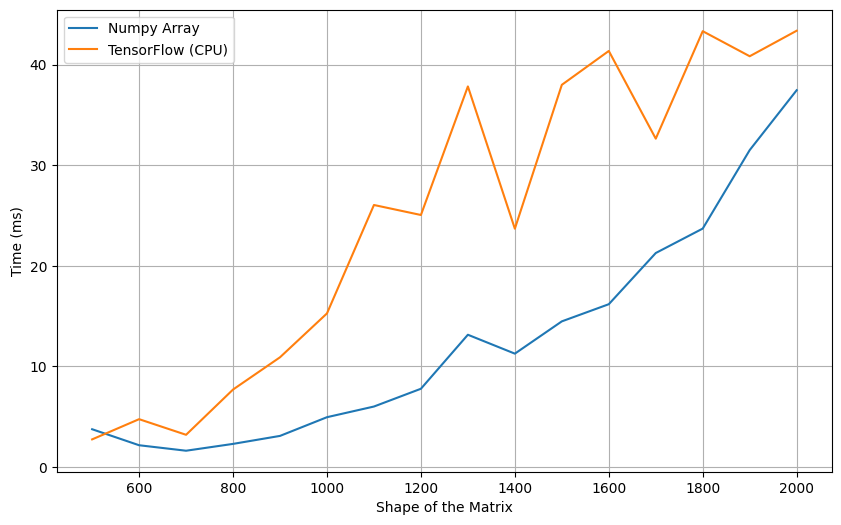

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(shape_dim, numpy_time, label="Numpy Array")
plt.plot(shape_dim, cpu_tf_time, label="TensorFlow (CPU)")

if len(gpu_tf_time) > 0:
    plt.plot(shape_dim, gpu_tf_time, label="TensorFlow (GPU)")

plt.grid(True)
plt.xlabel("Shape of the Matrix")
plt.ylabel("Time (ms)")
plt.legend()
plt.show()

👉 **Google Colab'ı nasıl kuracağınızla ilgili [eğitimimizi](https://docs.google.com/document/d/1oU4pQbNxCfu5Rm1ANfIqgylZfExsTVrnMLdKZz4toig/edit?usp=sharing)  inceleyin, önümüzdeki günlerde bunu kullanacaksınız**

# 3️⃣ (isteğe bağlı) - Orman Yangınları Mücadelesi 
(👩‍🎓Öğrenci liderliğinde)

### (1) Veriler

`tensorflow_dataset`, <a href="https://www.tensorflow.org/datasets/catalog/overview">burada</a> bulunan birçok `Datasets` sağlar.

**`forest_fires`** veri setini yükleyelim. Hedef, yangın nedeniyle zarar gören alandır (daha fazla ayrıntı için https://www.tensorflow.org/datasets/catalog/forest_fires).

In [33]:
import tensorflow_datasets as tfds
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [34]:
area, features = tfds.as_numpy(
    tfds.load(
        "forest_fires",
        split="train",
        batch_size=-1,
        as_supervised=True,
    )
)

In [35]:
X = pd.DataFrame(features).to_numpy(dtype=np.float32)
y = area.astype(np.float32)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [37]:
print("X shape:", X.shape)
print("y shape:", y.shape)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes :", X_test.shape, y_test.shape)

print("X dtype:", X.dtype, "y dtype:", y.dtype)

X shape: (517, 12)
y shape: (517,)
Train shapes: (361, 12) (361,)
Test shapes : (156, 12) (156,)
X dtype: float32 y dtype: float32


### (2) Modelinizin genel mimarisini açıklayın


❓ Keras'ı import edin ve bir Sıralı model tanımlayın

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

❓ 50 nöronlu ve `relu` aktivasyon fonksiyonlu bir Dense katmanı ekleyin. Giriş şeklini belirtmeyi unutmayın.

In [39]:
model.add(layers.Dense(50, activation="relu", input_shape=(X_train.shape[1],)))

/Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


❓ 20 nöronlu ve `relu` aktivasyon fonksiyonlu ikinci bir tam bağlantılı katman ekleyin.

In [40]:
model.add(layers.Dense(20, activation="relu"))

❓ Regresyon görevinize uygun son bir katman ekleyin

In [41]:
model.add(layers.Dense(1))

❓ Modelinizin parametre sayısını kontrol edin.

Yoğun Sinir Ağınızın her katmanında yer alan parametre sayısını doğru anladığınızdan emin olmak için bunları manuel olarak yeniden sayın.

In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,691 (6.61 KB)

 Trainable params: 1,691 (6.61 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
input_dim = X_train.shape[1]

p1 = (input_dim + 1) * 50
p2 = (50 + 1) * 20
p3 = (20 + 1) * 1

print("Manual params:", p1 + p2 + p3)
print("Breakdown:", {"Dense50": p1, "Dense20": p2, "Out1": p3})

Manual params: 1691
Breakdown: {'Dense50': 650, 'Dense20': 1020, 'Out1': 21}


### (3) Modelinizin nasıl eğitildiğini tanımlayın 


❓ Modeli `adam` `optimizer` ve `mse` `loss` ile derleyin.

In [44]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=[keras.metrics.MeanAbsoluteError(name="mae")]
)

❓Modeli bu rastgele veriler üzerinde çalıştırın; bir dizi `epochs` ve bir `batch_size` seçmeyi unutmayın. Geri dönen sonucu `history` içinde saklayın.

In [45]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26856.2148 - mae: 142.0754 - val_loss: 11194.7285 - val_mae: 94.1322
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11850.0986 - mae: 80.5433 - val_loss: 2506.9314 - val_mae: 44.1026
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7367.0000 - mae: 36.1322 - val_loss: 726.9932 - val_mae: 16.5181
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6826.9966 - mae: 17.5365 - val_loss: 861.3187 - val_mae: 14.8340
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6931.3486 - mae: 17.9482 - val_loss: 789.3861 - val_mae: 13.7253
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6774.0508 - mae: 17.4715 - val_loss: 702.2813 - val_mae: 14.6302
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6671.6440 - mae: 20.4495 - val_loss: 720.2938 - val_mae: 17.3155
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6634.4526 - mae: 22.3463 - val_loss: 723.4842 - val_mae: 17.5936
Epoch 9/50
9/9 ━━━━━━━━━━━

❓ Model yakınsamasını çiz

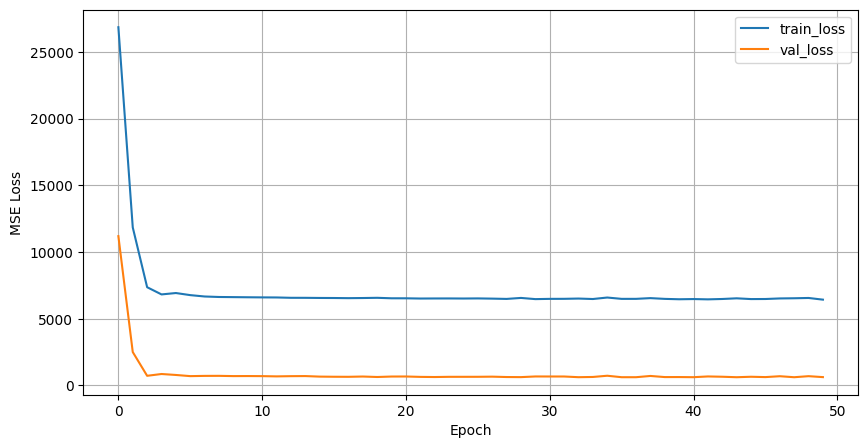

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.show()

❓ Bir `init_model` fonksiyonu içinde derlemesi ile birlikte tüm modeli yazın.

In [47]:
def init_model(input_dim: int) -> keras.Model:
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(50, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(1, activation="linear")
    ], name="ff_regressor")

    model.compile(
        optimizer="adam",
        loss="mse",
        metrics=[keras.metrics.MeanAbsoluteError(name="mae")]
    )
    return model

# örnek kullanım:
fresh_model = init_model(X_train.shape[1])
fresh_model.summary()

Model: "ff_regressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,691 (6.61 KB)

 Trainable params: 1,691 (6.61 KB)

 Non-trainable params: 0 (0.00 B)

Modelin parametrelerini yeniden başlatmak için, bazı verileri uydurmadan önce modeli sistematik olarak yeniden oluşturmanız (init işleviyle) önerilir.

Az önce yazdığınız model regresyon görevleri için uygundur.

Peki, ikili sınıflandırma görevi gerçekleştirmek istersek ne yapmalıyız?

❓ Başka bir `init_model_2` işlevi yazın ve bu işlevde şunları değiştirin:
* mimarinin son katmanı 
* ve ikili sınıf sınıflandırma probleminde kullanılan derleme yöntemi.

In [48]:
import numpy as np

# Binary label üretelim (örnek amaçlı)
threshold = np.median(y_train)
y_train_bin = (y_train > threshold).astype("int32")
y_test_bin  = (y_test  > threshold).astype("int32")

def init_model_2(input_dim: int) -> keras.Model:
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(50, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(1, activation="sigmoid")   # binary için
    ], name="ff_binary_classifier")

    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=[keras.metrics.BinaryAccuracy(name="acc"), keras.metrics.AUC(name="auc")]
    )
    return model

bin_model = init_model_2(X_train.shape[1])
bin_model.summary()

Model: "ff_binary_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,691 (6.61 KB)

 Trainable params: 1,691 (6.61 KB)

 Non-trainable params: 0 (0.00 B)

❓ 10 sınıflı bir sınıflandırma problemi için bir model tanımlamak üzere son bir fonksiyon yazın.

In [49]:
# 10 sınıf etiketi üretelim (örnek amaçlı)
# quantile sınırları:
bins = np.quantile(y_train, q=np.linspace(0, 1, 11))
# np.digitize 1..10 döndürür, biz 0..9 isteriz:
y_train_10 = (np.digitize(y_train, bins[1:-1], right=True)).astype("int32")
y_test_10  = (np.digitize(y_test,  bins[1:-1], right=True)).astype("int32")

def init_model_10class(input_dim: int, n_classes: int = 10) -> keras.Model:
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(50, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(n_classes, activation="softmax")
    ], name="ff_10class_classifier")

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
    )
    return model

mc_model = init_model_10class(X_train.shape[1], 10)
mc_model.summary()

Model: "ff_10class_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,880 (7.34 KB)

 Trainable params: 1,880 (7.34 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
_ = mc_model.fit(
    X_train, y_train_10,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.1667 - loss: 24.1083 - val_acc: 0.3425 - val_loss: 12.9461
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3715 - loss: 10.7338 - val_acc: 0.1096 - val_loss: 11.3801
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3125 - loss: 7.2565 - val_acc: 0.1918 - val_loss: 9.2901
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.2917 - loss: 5.5194 - val_acc: 0.2877 - val_loss: 6.5446
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.2951 - loss: 4.8421 - val_acc: 0.1370 - val_loss: 7.1832
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3194 - loss: 4.5699 - val_acc: 0.1918 - val_loss: 5.4388
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3021 - loss: 3.8550 - val_acc: 0.2877 - val_loss: 4.8778
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3403 - loss: 3.6717 - val_acc: 0.2603 - val_loss: 4.5767
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3576 - loss: 3.4139 - val_a